In [9]:
import pandas as pd
import json

# Use the exact path you provided
file_path = "C:\\Users\\ompat\\Downloads\\user-wallet-transactions.json"

try:
    with open(file_path, 'r') as f:
        raw_data = json.load(f)
    df = pd.DataFrame(raw_data)
    print("Data loaded successfully. First 5 rows:")
    print(df.head())
    print(f"\nTotal number of transactions: {len(df)}")
except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found. Please ensure the path is correct and the file exists.")
except Exception as e:
    print(f"An error occurred: {e}")

Data loaded successfully. First 5 rows:
                                    _id  \
0  {'$oid': '681d38fed63812d4655f571a'}   
1  {'$oid': '681aa70dd6df53021cc6f3c0'}   
2  {'$oid': '681d04c2d63812d4654c733e'}   
3  {'$oid': '681d133bd63812d46551b6ef'}   
4  {'$oid': '681899e4ba49fc91cf2f4454'}   

                                   userWallet  network protocol  \
0  0x00000000001accfa9cef68cf5371a23025b6d4b6  polygon  aave_v2   
1  0x000000000051d07a4fb3bd10121a343d85818da6  polygon  aave_v2   
2  0x000000000096026fb41fc39f9875d164bd82e2dc  polygon  aave_v2   
3  0x000000000096026fb41fc39f9875d164bd82e2dc  polygon  aave_v2   
4  0x0000000000e189dd664b9ab08a33c4839953852c  polygon  aave_v2   

                                              txHash  \
0  0x695c69acf608fbf5d38e48ca5535e118cc213a89e3d6...   
1  0xe6fc162c86b2928b0ba9b82bda672763665152b9de9d...   
2  0xe2d7eb815c89331a734ed6f204a06c385a1b39040baa...   
3  0x0d63a2eacd82b82f868db825ea7385e6bd8d046ee729...   
4  0x590eabb812c50

In [13]:
print(df.columns)


Index(['_id', 'userWallet', 'network', 'protocol', 'txHash', 'logId',
       'timestamp', 'blockNumber', 'action', 'actionData', '__v', 'createdAt',
       'updatedAt'],
      dtype='object')


In [19]:
# Convert 'timestamp' to datetime objects
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')
print("\n'timestamp' column converted to datetime.")

# Extract 'amount', 'assetPriceUSD', AND 'assetSymbol' from the nested 'actionData' dictionary column
# Use .get() method to safely retrieve values and handle potential missing keys/non-dict entries
df['actionData.amount'] = df['actionData'].apply(lambda x: x.get('amount') if isinstance(x, dict) else None)
df['actionData.assetPriceUSD'] = df['actionData'].apply(lambda x: x.get('assetPriceUSD') if isinstance(x, dict) else None)
df['actionData.assetSymbol'] = df['actionData'].apply(lambda x: x.get('assetSymbol') if isinstance(x, dict) else None) # NEW LINE

print("\nExtracted 'amount', 'assetPriceUSD', and 'assetSymbol' from nested 'actionData'.")

# Convert extracted numeric columns to numeric, coercing errors to NaN
df['actionData.amount'] = pd.to_numeric(df['actionData.amount'], errors='coerce')
df['actionData.assetPriceUSD'] = pd.to_numeric(df['actionData.assetPriceUSD'], errors='coerce')
# 'actionData.assetSymbol' is a string/object, so no numeric conversion needed

print("'actionData.amount' and 'actionData.assetPriceUSD' converted to numeric.")

# Drop rows where essential numeric data might be missing after coercion
df.dropna(subset=['actionData.amount', 'actionData.assetPriceUSD'], inplace=True)
print(f"Dropped rows with missing amount or price data. Remaining transactions: {len(df)}")

# Check data types and a sample of the processed data
print("\nData types after conversion:")
print(df.info())
print("\nFirst 5 rows with new extracted columns:")
# Now we can safely include 'actionData.assetSymbol' in the head() display
print(df[['userWallet', 'action', 'timestamp', 'actionData.amount', 'actionData.assetPriceUSD', 'actionData.assetSymbol']].head())


'timestamp' column converted to datetime.

Extracted 'amount', 'assetPriceUSD', and 'assetSymbol' from nested 'actionData'.
'actionData.amount' and 'actionData.assetPriceUSD' converted to numeric.
Dropped rows with missing amount or price data. Remaining transactions: 100000

Data types after conversion:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 17 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   _id                       100000 non-null  object        
 1   userWallet                100000 non-null  object        
 2   network                   100000 non-null  object        
 3   protocol                  100000 non-null  object        
 4   txHash                    100000 non-null  object        
 5   logId                     100000 non-null  object        
 6   timestamp                 100000 non-null  datetime64[ns]
 7   blockNumber

In [21]:
df['amount_usd'] = df['actionData.amount'] * df['actionData.assetPriceUSD']
print("\n'amount_usd' column created.")

# Display a sample of the new column along with the original components for verification
print("\nFirst 5 rows with new 'amount_usd' column (now including assetSymbol):")
print(df[['userWallet', 'action', 'actionData.assetSymbol', 'actionData.amount', 'actionData.assetPriceUSD', 'amount_usd']].head())


'amount_usd' column created.

First 5 rows with new 'amount_usd' column (now including assetSymbol):
                                   userWallet            action  \
0  0x00000000001accfa9cef68cf5371a23025b6d4b6           deposit   
1  0x000000000051d07a4fb3bd10121a343d85818da6           deposit   
2  0x000000000096026fb41fc39f9875d164bd82e2dc           deposit   
3  0x000000000096026fb41fc39f9875d164bd82e2dc           deposit   
4  0x0000000000e189dd664b9ab08a33c4839953852c  redeemunderlying   

  actionData.assetSymbol  actionData.amount  actionData.assetPriceUSD  \
0                   USDC       2.000000e+09                  0.993832   
1                 WMATIC       1.450000e+20                  1.970307   
2                 WMATIC       1.000000e+15                  0.922377   
3                 WMATIC       4.000000e+15                  1.057483   
4                   USDC       5.015480e+05                  1.002130   

     amount_usd  
0  1.987664e+09  
1  2.856945e+20  
2 

In [23]:


# Initialize an empty DataFrame to store wallet-level features
wallet_features = pd.DataFrame()

# Group the DataFrame by 'userWallet'
grouped = df.groupby('userWallet')

# --- Activity Features ---
# Total Number of Transactions for each wallet
wallet_features['total_transactions'] = grouped.size()

# Number of Unique Actions (e.g., how many different types of actions a wallet performed)
wallet_features['num_unique_actions'] = grouped['action'].nunique()

# Counts for each specific Action Type (e.g., how many 'deposit' transactions, how many 'borrow' transactions)
# We use pivot_table to get counts of each action type per wallet, then merge it.
action_counts = df.pivot_table(index='userWallet', columns='action', aggfunc='size', fill_value=0)
wallet_features = wallet_features.merge(action_counts, left_index=True, right_index=True, how='left')
# Rename columns for clarity (e.g., 'deposit' becomes 'deposit_count')
wallet_features.rename(columns={col: f'{col.lower()}_count' for col in action_counts.columns}, inplace=True)

# First and Last Transaction Timestamps, and Wallet Age
wallet_features['first_transaction_timestamp'] = grouped['timestamp'].min()
wallet_features['last_transaction_timestamp'] = grouped['timestamp'].max()
# Calculate wallet age in days
wallet_features['wallet_age_days'] = (wallet_features['last_transaction_timestamp'] - wallet_features['first_transaction_timestamp']).dt.days


# --- Volume Features (in USD) ---
# Total Deposited Amount (USD)
# We filter by action and then sum the 'amount_usd'
wallet_features['total_deposited_usd'] = df[df['action'] == 'deposit'].groupby('userWallet')['amount_usd'].sum().fillna(0)

# Total Borrowed Amount (USD)
wallet_features['total_borrowed_usd'] = df[df['action'] == 'borrow'].groupby('userWallet')['amount_usd'].sum().fillna(0)

# Total Repaid Amount (USD)
wallet_features['total_repaid_usd'] = df[df['action'] == 'repay'].groupby('userWallet')['amount_usd'].sum().fillna(0)

# Total Redeemed Amount (USD)
wallet_features['total_redeemed_usd'] = df[df['action'] == 'redeemUnderlying'].groupby('userWallet')['amount_usd'].sum().fillna(0)

# Net Deposit/Borrow Amount (USD): Indicates if a wallet is net depositing or net borrowing
wallet_features['net_deposit_borrow_usd'] = wallet_features['total_deposited_usd'] - wallet_features['total_borrowed_usd']

# Average Transaction Amount (USD) for deposits, borrows, and repays
wallet_features['avg_deposit_usd'] = df[df['action'] == 'deposit'].groupby('userWallet')['amount_usd'].mean().fillna(0)
wallet_features['avg_borrow_usd'] = df[df['action'] == 'borrow'].groupby('userWallet')['amount_usd'].mean().fillna(0)
wallet_features['avg_repay_usd'] = df[df['action'] == 'repay'].groupby('userWallet')['amount_usd'].mean().fillna(0)

# --- Behavioral Features ---
# Repayment Ratio: Ratio of total repaid amount to total borrowed amount
# Handles division by zero: if total_borrowed_usd is 0, it means no borrows, so repayment is considered perfect (ratio of 1)
wallet_features['repayment_ratio'] = wallet_features.apply(
    lambda row: row['total_repaid_usd'] / row['total_borrowed_usd'] if row['total_borrowed_usd'] > 0 else 1,
    axis=1
)

# Number of Liquidations (already calculated as 'liquidationcall_count' from action_counts, but renaming for clarity)
wallet_features.rename(columns={'liquidationcall_count': 'num_liquidations'}, inplace=True)

# Redeem-to-Deposit Ratio: How much a user redeems relative to their deposits
# Handles division by zero: if total_deposited_usd is 0, ratio is 0
wallet_features['redeem_to_deposit_ratio'] = wallet_features.apply(
    lambda row: row['total_redeemed_usd'] / row['total_deposited_usd'] if row['total_deposited_usd'] > 0 else 0,
    axis=1
)

# Number of unique assets used (for any action)
wallet_features['num_unique_assets'] = grouped['actionData.assetSymbol'].nunique()

# Fill any remaining NaN values that might have resulted from merges or specific aggregations
# For example, if a wallet never had a 'borrow' action, its 'total_borrowed_usd' would be NaN without fillna in previous steps,
# but it's good to have a final fillna for robustness.
wallet_features.fillna(0, inplace=True)

print("\nWallet-level features created. First 5 rows of the 'wallet_features' DataFrame:")
print(wallet_features.head())
print(f"\nShape of 'wallet_features' DataFrame: {wallet_features.shape}")
print("\nColumns in 'wallet_features' DataFrame:")
print(wallet_features.columns.tolist())




Wallet-level features created. First 5 rows of the 'wallet_features' DataFrame:
                                            total_transactions  \
userWallet                                                       
0x00000000001accfa9cef68cf5371a23025b6d4b6                   1   
0x000000000051d07a4fb3bd10121a343d85818da6                   1   
0x000000000096026fb41fc39f9875d164bd82e2dc                   2   
0x0000000000e189dd664b9ab08a33c4839953852c                  17   
0x0000000002032370b971dabd36d72f3e5a7bf1ee                 399   

                                            num_unique_actions  borrow_count  \
userWallet                                                                     
0x00000000001accfa9cef68cf5371a23025b6d4b6                   1             0   
0x000000000051d07a4fb3bd10121a343d85818da6                   1             0   
0x000000000096026fb41fc39f9875d164bd82e2dc                   1             0   
0x0000000000e189dd664b9ab08a33c4839953852c              

In [25]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Make a copy to avoid modifying the original wallet_features DataFrame directly
scoring_df = wallet_features.copy()

# --- Feature Scaling/Normalization ---
# It's crucial to scale your features so that a large value in one feature doesn't
# disproportionately dominate the score calculation.
# MinMaxScaler scales features to a given range, typically [0, 1].

# Identify numerical features to scale (excluding timestamps and potentially some counts if you want them raw)
numerical_features = [
    'total_transactions',
    'num_unique_actions',
    'borrow_count',
    'deposit_count',
    'redeemunderlying_count', # Exclude num_liquidations from direct scaling for now, we'll use it as a direct penalty
    'repay_count',
    'wallet_age_days',
    'total_deposited_usd',
    'total_borrowed_usd',
    'total_repaid_usd',
    'total_redeemed_usd',
    'net_deposit_borrow_usd',
    'avg_deposit_usd',
    'avg_borrow_usd',
    'avg_repay_usd',
    'repayment_ratio',
    'redeem_to_deposit_ratio',
    'num_unique_assets'
]

# Handle potential infinite values in ratios (if total_borrowed_usd was 0 but repaid > 0, which shouldn't happen but defensive)
# Replace inf with a large number or 1.0 depending on the ratio logic
scoring_df.replace([np.inf, -np.inf], np.nan, inplace=True)
# Fill any NaNs that might have been introduced by divisions (e.g., if a wallet never borrowed)
# We already did fillna(0) for the features, but good to be defensive before scaling.
scoring_df.fillna(0, inplace=True)


# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Apply scaling to selected numerical features
scoring_df[numerical_features] = scaler.fit_transform(scoring_df[numerical_features])
print("\nNumerical features scaled to [0, 1] range.")
print(scoring_df[numerical_features].head())


# --- Heuristic Score Calculation ---
# Define a base score and apply weights based on features
# These weights are examples; you will need to adjust them based on your
# understanding of what constitutes 'good' and 'bad' behavior.

base_score = 500 # Start with a neutral score of 500 (out of 1000)
score_range = 500 # Max deviation from base_score in either direction (500 + 500 = 1000, 500 - 500 = 0)

# Initialize raw score before clamping to 0-1000
scoring_df['raw_credit_score'] = base_score

# Positive Contributors (increase score)
# Max contribution of each factor should be considered relative to score_range
scoring_df['raw_credit_score'] += scoring_df['repayment_ratio'] * (score_range * 0.4) # High repayment is very good
scoring_df['raw_credit_score'] += scoring_df['total_deposited_usd'] * (score_range * 0.2) # More deposits, better
scoring_df['raw_credit_score'] += scoring_df['wallet_age_days'] * (score_range * 0.1) # Older wallets, more reliable
scoring_df['raw_credit_score'] += scoring_df['deposit_count'] * (score_range * 0.05) # Active depositors
scoring_df['raw_credit_score'] += scoring_df['num_unique_actions'] * (score_range * 0.05) # Diverse engagement
scoring_df['raw_credit_score'] += scoring_df['num_unique_assets'] * (score_range * 0.05) # Asset diversification


# Negative Contributors (decrease score)
# These typically subtract directly or as strong penalties.
# num_liquidations: A very strong negative signal. Each liquidation reduces the score significantly.
# You might want to cap the penalty or use a non-linear penalty if many liquidations occur.
liquidation_penalty_per_event = 200 # A significant penalty per liquidation
scoring_df['raw_credit_score'] -= scoring_df['num_liquidations'] * liquidation_penalty_per_event

# Redeem-to-Deposit Ratio: High redemption relative to deposits might be risky.
# If a wallet redeems everything quickly after a deposit, that's less reliable behavior.
scoring_df['raw_credit_score'] -= scoring_df['redeem_to_deposit_ratio'] * (score_range * 0.2)


# --- Final Score Clamping and Normalization to 0-1000 ---
# Ensure the score is between 0 and 1000
scoring_df['credit_score'] = scoring_df['raw_credit_score'].clip(lower=0, upper=1000)

print("\nHeuristic credit scores calculated.")
print(scoring_df[['total_transactions', 'deposit_count', 'repayment_ratio', 'num_liquidations', 'credit_score']].head())

print(f"\nCredit Score Distribution (Min: {scoring_df['credit_score'].min():.2f}, Max: {scoring_df['credit_score'].max():.2f}, Mean: {scoring_df['credit_score'].mean():.2f})")


Numerical features scaled to [0, 1] range.
                                            total_transactions  \
userWallet                                                       
0x00000000001accfa9cef68cf5371a23025b6d4b6            0.000000   
0x000000000051d07a4fb3bd10121a343d85818da6            0.000000   
0x000000000096026fb41fc39f9875d164bd82e2dc            0.000070   
0x0000000000e189dd664b9ab08a33c4839953852c            0.001122   
0x0000000002032370b971dabd36d72f3e5a7bf1ee            0.027902   

                                            num_unique_actions  borrow_count  \
userWallet                                                                     
0x00000000001accfa9cef68cf5371a23025b6d4b6                0.00         0.000   
0x000000000051d07a4fb3bd10121a343d85818da6                0.00         0.000   
0x000000000096026fb41fc39f9875d164bd82e2dc                0.00         0.000   
0x0000000000e189dd664b9ab08a33c4839953852c                0.00         0.000   
0x00000000020

In [27]:
import pandas as pd
import json
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import os # For path manipulation

# --- Define Input and Output Paths ---
# IMPORTANT: Update these paths to your actual file locations!
input_json_path = "C:\\Users\\ompat\\Downloads\\user-wallet-transactions.json"
output_csv_path = "wallet_scores.csv" # This will create the CSV in the same directory as your notebook


print(f"Starting score generation for: {input_json_path}")

# --- Step 2.1: Data Loading ---
try:
    with open(input_json_path, 'r') as f:
        raw_data = json.load(f)
    df = pd.DataFrame(raw_data)
    print(f"Successfully loaded {len(df)} transactions.")
except FileNotFoundError:
    print(f"Error: Input file not found at '{input_json_path}'. Please check the path.")
    # You might want to halt execution or raise an error here in a real scenario
    raise FileNotFoundError(f"Input file not found: {input_json_path}")
except Exception as e:
    print(f"An error occurred during file loading: {e}")
    raise # Re-raise the exception to stop execution if data loading fails

# --- Step 2.2: Data Cleaning and Type Conversion ---
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')
print("Converted 'timestamp' to datetime.")

df['actionData.amount'] = df['actionData'].apply(lambda x: x.get('amount') if isinstance(x, dict) else None)
df['actionData.assetPriceUSD'] = df['actionData'].apply(lambda x: x.get('assetPriceUSD') if isinstance(x, dict) else None)
df['actionData.assetSymbol'] = df['actionData'].apply(lambda x: x.get('assetSymbol') if isinstance(x, dict) else None)
print("Extracted 'amount', 'assetPriceUSD', and 'assetSymbol' from nested 'actionData'.")

df['actionData.amount'] = pd.to_numeric(df['actionData.amount'], errors='coerce')
df['actionData.assetPriceUSD'] = pd.to_numeric(df['actionData.assetPriceUSD'], errors='coerce')

initial_rows = len(df)
df.dropna(subset=['actionData.amount', 'actionData.assetPriceUSD'], inplace=True)
print(f"Dropped {initial_rows - len(df)} rows with missing amount or price data. Remaining transactions: {len(df)}")

# --- Step 2.3: Derive USD Values ---
df['amount_usd'] = df['actionData.amount'] * df['actionData.assetPriceUSD']
print("Created 'amount_usd' column.")

# --- Step 2.4: Feature Grouping (Per Wallet) ---
wallet_features = pd.DataFrame()
grouped = df.groupby('userWallet')

wallet_features['total_transactions'] = grouped.size()
wallet_features['num_unique_actions'] = grouped['action'].nunique()

action_counts = df.pivot_table(index='userWallet', columns='action', aggfunc='size', fill_value=0)
wallet_features = wallet_features.merge(action_counts, left_index=True, right_index=True, how='left')
wallet_features.rename(columns={col: f'{col.lower()}_count' for col in action_counts.columns}, inplace=True)

wallet_features['first_transaction_timestamp'] = grouped['timestamp'].min()
wallet_features['last_transaction_timestamp'] = grouped['timestamp'].max()
wallet_features['wallet_age_days'] = (wallet_features['last_transaction_timestamp'] - wallet_features['first_transaction_timestamp']).dt.days

wallet_features['total_deposited_usd'] = df[df['action'] == 'deposit'].groupby('userWallet')['amount_usd'].sum().fillna(0)
wallet_features['total_borrowed_usd'] = df[df['action'] == 'borrow'].groupby('userWallet')['amount_usd'].sum().fillna(0)
wallet_features['total_repaid_usd'] = df[df['action'] == 'repay'].groupby('userWallet')['amount_usd'].sum().fillna(0)
wallet_features['total_redeemed_usd'] = df[df['action'] == 'redeemUnderlying'].groupby('userWallet')['amount_usd'].sum().fillna(0)
wallet_features['net_deposit_borrow_usd'] = wallet_features['total_deposited_usd'] - wallet_features['total_borrowed_usd']
wallet_features['avg_deposit_usd'] = df[df['action'] == 'deposit'].groupby('userWallet')['amount_usd'].mean().fillna(0)
wallet_features['avg_borrow_usd'] = df[df['action'] == 'borrow'].groupby('userWallet')['amount_usd'].mean().fillna(0)
wallet_features['avg_repay_usd'] = df[df['action'] == 'repay'].groupby('userWallet')['amount_usd'].mean().fillna(0)

wallet_features['repayment_ratio'] = wallet_features.apply(
    lambda row: row['total_repaid_usd'] / row['total_borrowed_usd'] if row['total_borrowed_usd'] > 0 else 1,
    axis=1
)
wallet_features.rename(columns={'liquidationcall_count': 'num_liquidations'}, inplace=True)

wallet_features['redeem_to_deposit_ratio'] = wallet_features.apply(
    lambda row: row['total_redeemed_usd'] / row['total_deposited_usd'] if row['total_deposited_usd'] > 0 else 0,
    axis=1
)
wallet_features['num_unique_assets'] = grouped['actionData.assetSymbol'].nunique()

wallet_features.fillna(0, inplace=True)
print(f"Engineered features for {len(wallet_features)} unique wallets.")

# --- Step 3.1: Heuristic Score Calculation ---
scoring_df = wallet_features.copy()

numerical_features = [
    'total_transactions', 'num_unique_actions', 'borrow_count', 'deposit_count',
    'redeemunderlying_count', 'repay_count', 'wallet_age_days',
    'total_deposited_usd', 'total_borrowed_usd', 'total_repaid_usd',
    'total_redeemed_usd', 'net_deposit_borrow_usd',
    'avg_deposit_usd', 'avg_borrow_usd', 'avg_repay_usd',
    'repayment_ratio', 'redeem_to_deposit_ratio', 'num_unique_assets'
]

scoring_df.replace([np.inf, -np.inf], np.nan, inplace=True)
scoring_df.fillna(0, inplace=True) # Fill NaNs introduced by divisions etc. before scaling

scaler = MinMaxScaler()
scoring_df[numerical_features] = scaler.fit_transform(scoring_df[numerical_features])
print("Numerical features scaled.")

base_score = 500
score_range = 500

scoring_df['raw_credit_score'] = base_score
scoring_df['raw_credit_score'] += scoring_df['repayment_ratio'] * (score_range * 0.4)
scoring_df['raw_credit_score'] += scoring_df['total_deposited_usd'] * (score_range * 0.2)
scoring_df['raw_credit_score'] += scoring_df['wallet_age_days'] * (score_range * 0.1)
scoring_df['raw_credit_score'] += scoring_df['deposit_count'] * (score_range * 0.05)
scoring_df['raw_credit_score'] += scoring_df['num_unique_actions'] * (score_range * 0.05)
scoring_df['raw_credit_score'] += scoring_df['num_unique_assets'] * (score_range * 0.05)

liquidation_penalty_per_event = 200
scoring_df['raw_credit_score'] -= scoring_df['num_liquidations'] * liquidation_penalty_per_event
scoring_df['raw_credit_score'] -= scoring_df['redeem_to_deposit_ratio'] * (score_range * 0.2)

scoring_df['credit_score'] = scoring_df['raw_credit_score'].clip(lower=0, upper=1000)
print("Heuristic credit scores calculated.")

# --- Output Scores ---
final_scores = scoring_df[['credit_score']].copy()
final_scores.index.name = 'userWallet' # Ensure the index name is set for the CSV output

# Save to CSV
final_scores.to_csv(output_csv_path)
print(f"Wallet scores saved to: {output_csv_path}")

print(f"Final Score Distribution: Min={final_scores['credit_score'].min():.2f}, Max={final_scores['credit_score'].max():.2f}, Mean={final_scores['credit_score'].mean():.2f}")

# You can optionally display the first few scores directly in the notebook
print("\nFirst 5 wallet scores:")
print(final_scores.head())

Starting score generation for: C:\Users\ompat\Downloads\user-wallet-transactions.json
Successfully loaded 100000 transactions.
Converted 'timestamp' to datetime.
Extracted 'amount', 'assetPriceUSD', and 'assetSymbol' from nested 'actionData'.
Dropped 0 rows with missing amount or price data. Remaining transactions: 100000
Created 'amount_usd' column.
Engineered features for 3497 unique wallets.
Numerical features scaled.
Heuristic credit scores calculated.
Wallet scores saved to: wallet_scores.csv
Final Score Distribution: Min=0.00, Max=725.10, Mean=556.98

First 5 wallet scores:
                                            credit_score
userWallet                                              
0x00000000001accfa9cef68cf5371a23025b6d4b6    558.699967
0x000000000051d07a4fb3bd10121a343d85818da6    558.700438
0x000000000096026fb41fc39f9875d164bd82e2dc    561.036472
0x0000000000e189dd664b9ab08a33c4839953852c    610.182906
0x0000000002032370b971dabd36d72f3e5a7bf1ee    590.084269


In [29]:
import os

# Print the current working directory of your notebook
print(os.getcwd())

C:\Users\ompat


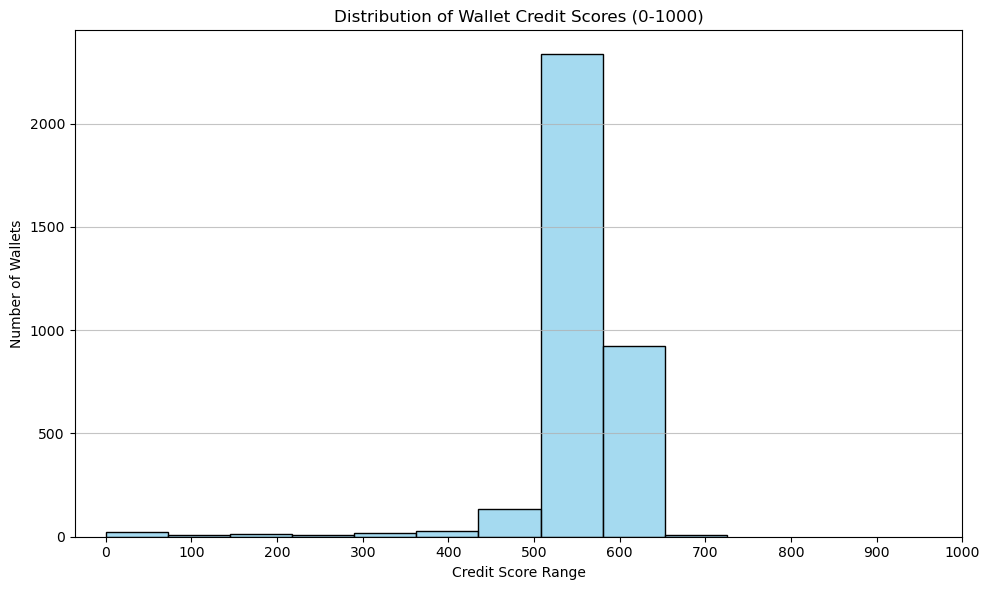

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'final_scores' DataFrame is available from your previous run
# If not, ensure the scoring part of your notebook runs first to generate it.

plt.figure(figsize=(10, 6))
sns.histplot(final_scores['credit_score'], bins=10, kde=False, color='skyblue', edgecolor='black')
plt.title('Distribution of Wallet Credit Scores (0-1000)')
plt.xlabel('Credit Score Range')
plt.ylabel('Number of Wallets')
plt.xticks(range(0, 1001, 100))
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.savefig('credit_score_distribution.png') # Save the plot as an image
plt.show()

In [33]:
# Wallets with scores between 0 and 100
low_score_wallets = scoring_df[scoring_df['credit_score'] <= 100].head()
print("Wallets with very low scores:")
print(low_score_wallets[['num_liquidations', 'total_borrowed_usd', 'repayment_ratio', 'credit_score']])

Wallets with very low scores:
                                            num_liquidations  \
userWallet                                                     
0x000006eee6e39015cb523aebdd4d0b1855aba682                 3   
0x003be39433bde975b12411fbc3025d49d813a84f                 3   
0x00800d9019001aff6e1eba3312e35e9b22d3f058                 4   
0x00d5201c4def4d1a199c63e07eac53f43252a0ea                 4   
0x012fefa16a3baad884834385a0988378852d00bc                 4   

                                            total_borrowed_usd  \
userWallet                                                       
0x000006eee6e39015cb523aebdd4d0b1855aba682        6.562275e-04   
0x003be39433bde975b12411fbc3025d49d813a84f        2.088250e-20   
0x00800d9019001aff6e1eba3312e35e9b22d3f058        1.510097e-15   
0x00d5201c4def4d1a199c63e07eac53f43252a0ea        7.678628e-06   
0x012fefa16a3baad884834385a0988378852d00bc        3.217143e-19   

                                            repayment_rati

In [35]:
# Wallets with scores above 700 (or close to max)
high_score_wallets = scoring_df[scoring_df['credit_score'] >= 700].head()
print("\nWallets with very high scores:")
print(high_score_wallets[['total_deposited_usd', 'wallet_age_days', 'repayment_ratio', 'num_liquidations', 'credit_score']])


Wallets with very high scores:
                                            total_deposited_usd  \
userWallet                                                        
0x04be2a942c1060db1c7615670bb55950a52f8b15         1.629693e-07   

                                            wallet_age_days  repayment_ratio  \
userWallet                                                                     
0x04be2a942c1060db1c7615670bb55950a52f8b15              0.0              1.0   

                                            num_liquidations  credit_score  
userWallet                                                                  
0x04be2a942c1060db1c7615670bb55950a52f8b15                 0    725.097864  
